In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
#making of synthetic Data
np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df1,df],ignore_index=True)
df = df.sample(40,replace=True)

In [291]:
df["target"].unique()

array([0, 1])

In [282]:
df.shape

(40, 4)

In [283]:
# mean centering the Data
from sklearn.preprocessing import StandardScaler
mean = StandardScaler(with_mean=True)

df.iloc[:,0:3]  = mean.fit_transform(X=df.iloc[:,0:3])

In [293]:
import plotly.io as pio
pio.renderers.default = 'browser'


import plotly.express as px

px.scatter_3d(df,x = df.iloc[:,0],y=df.iloc[:,1],z=df.iloc[:,2],color=df['target'].astype('str'))




In [292]:
cov_mat = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])

In [294]:
eigen_value,eigen_vector = np.linalg.eig(cov_mat)

In [295]:
eigen_vector

array([[ 0.35813712,  0.90783825,  0.21809981],
       [ 0.68462262, -0.09651057, -0.72248016],
       [ 0.63484618, -0.40806302,  0.65609062]])

In [296]:
eigen_value

array([1.48130622, 0.9782941 , 0.61732275])

In [297]:
eigen_vector = eigen_vector[0:2]

In [298]:
eigen_vector.shape

(2, 3)

In [ ]:

(df.iloc[:,0:3])

,feature1,feature2,feature3
3,1.010229,1.437830,2.327788
35,-0.045438,1.040886,-0.094035
9,1.425140,1.441152,0.182561
13,2.823378,-0.332863,2.637391
17,-1.027861,1.131416,2.603234
35,-0.045438,1.040886,-0.094035
6,0.898907,0.435960,0.820964
39,-0.992574,-0.161346,1.192404
7,2.011059,1.920996,2.933090
24,0.322272,0.060343,-1.043450


In [299]:


new_df = np.dot(df.iloc[:,0:3],eigen_vector.T)


In [301]:
new_df = pd.DataFrame(new_df,columns=["PC1","PC2"])

In [302]:
new_df["Target"]  =df["target"].values

In [303]:
new_df

,PC1,PC2,Target
0,1.438657,-0.410207,0
1,0.289497,0.267423,1
2,1.230506,1.014850,0
3,0.307672,0.771356,0
4,0.492776,-1.829017,0
5,0.289497,0.267423,1
6,0.143877,0.441110,0
7,-1.031013,-0.904683,1
8,2.359962,-0.149713,0
9,-0.732571,1.121180,1


<Axes: xlabel='PC1', ylabel='PC2'>

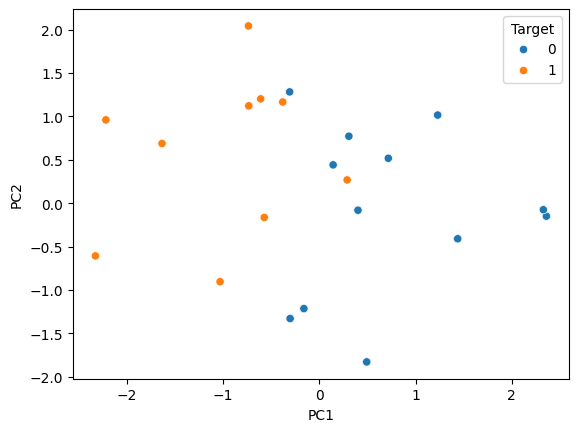

In [306]:
sns.scatterplot(x= new_df["PC1"],y=new_df["PC2"],hue=new_df["Target"])